In [1]:
import os

import nibabel as nib
import scipy.ndimage as ndi
from PIL import Image
import numpy as np
from matplotlib import pyplot as plt
import cv2
from sklearn.preprocessing import minmax_scale
import random
import image_augmentation_util

In [2]:
source_data_dir = "../assets/source_images"
output_train_dir = "../assets/train_images/train"
output_val_dir = "../assets/train_images/val"

In [3]:
images = os.listdir(source_data_dir)
print(len(images))

359


In [4]:
images[10]

'CC0011_philips_15_49_F.nii'

In [5]:
def read_3d_image(source_dir):
    three_d_image = nib.load(source_dir)
    
    return three_d_image

In [6]:
def save_slice_from_3d_data(source_dir, slice_number, output_dir, output_filename, max_height, max_width, augment=False):
    # read image
    three_d_image = read_3d_image(source_dir)
    three_d_image_data = three_d_image.get_fdata()
    if augment:
        image_slice = image_augmentation_util.augment_image(three_d_image_data, max_height=max_height, max_width=max_width, thresh_translation=10, thresh_rotation_angle=5, slice_number=slice_number)
        output_path = os.path.join(output_dir, "data", output_filename)
    else:
        image_slice = ndi.rotate(three_d_image_data[:, :, slice_number], 90)
        image_slice = image_augmentation_util.pad_image(image_slice, max_height, max_width)
        output_path = os.path.join(output_dir, "gt", output_filename)
    
    # scale image to 0-255
    scaled_image_slice = minmax_scale(image_slice.ravel(), feature_range=(0,255)).reshape(image_slice.shape)
    
    # pad images to be a constant size
    # pad_value = 0
    # height_diff = max_height - scaled_image_slice.shape[0]
    # width_diff = max_width - scaled_image_slice.shape[1]
    # top_pad = height_diff // 2
    # bottom_pad = height_diff - top_pad
    # left_pad = width_diff // 2
    # right_pad = width_diff - left_pad

    # Pad the image
    # min_pixel = np.min(scaled_image_slice)
    # padded_image = np.pad(scaled_image_slice, ((top_pad, bottom_pad), (left_pad, right_pad)), mode='median')
    
    image_slice_pil = Image.fromarray(scaled_image_slice)
    image_slice_pil = image_slice_pil.convert('L')
    image_slice_pil.save(output_path)
    return scaled_image_slice.shape

In [8]:
shapes = []

random.shuffle(images)

train_split = 0.9

train_images = images[:int(len(images) * train_split)]
test_images = images[int(len(images) * train_split):]

for image in train_images:
    if image.endswith("DS_Store"):
        continue
        
    output_filename = image.split(".")[0] + ".jpg"

    # save the augmented data in "data" dir
    save_slice_from_3d_data(os.path.join(source_data_dir, image), 160, output_train_dir, output_filename, 288, 256, augment=True)

    # save the ground truth in "gt" directory
    save_slice_from_3d_data(os.path.join(source_data_dir, image), 160, output_train_dir, output_filename, 288, 256, augment=False)
    
for image in test_images:
    if image.endswith("DS_Store"):
        continue
    
    output_filename = image.split(".")[0] + ".jpg"

    # save the augmented data in "data" dir
    save_slice_from_3d_data(os.path.join(source_data_dir, image), 160, output_val_dir, output_filename, 288, 256, augment=True)

    # save the ground truth in "gt" directory
    save_slice_from_3d_data(os.path.join(source_data_dir, image), 160, output_val_dir, output_filename, 288, 256, augment=False)

Translated for 1 pixels
Rotated 3.114401855872199 degrees in x axis
Rotated -2.913911277073268 degrees in y axis
Rotated -2.417587018417231 degrees in z axis
Translated for -1 pixels
Rotated -3.557843334559423 degrees in x axis
Rotated -0.44144918572818703 degrees in y axis
Rotated -2.54496547316438 degrees in z axis
Translated for -7 pixels
Rotated 2.25888392147235 degrees in x axis
Rotated -0.9642865715872393 degrees in y axis
Rotated 1.691370390801855 degrees in z axis
Translated for 1 pixels
Rotated -4.263159226889365 degrees in x axis
Rotated -0.5683514072329192 degrees in y axis
Rotated 2.0808190596228275 degrees in z axis
Translated for -8 pixels
Rotated -0.9092493727705007 degrees in x axis
Rotated -3.699605839439627 degrees in y axis
Rotated 1.8146129262534005 degrees in z axis
Translated for 9 pixels
Rotated 0.08200303109455653 degrees in x axis
Rotated -2.9374805660427783 degrees in y axis
Rotated -4.978857557274395 degrees in z axis
Translated for -8 pixels
Rotated -2.38502

KeyboardInterrupt: 

In [ ]:
shapes = np.array(shapes)

In [ ]:
shapes

array([[288, 256],
       [288, 256],
       [288, 256],
       [288, 256],
       [288, 256],
       [288, 256],
       [288, 256],
       [288, 256],
       [288, 256],
       [288, 256],
       [288, 256],
       [288, 256],
       [288, 256],
       [288, 256],
       [288, 256],
       [288, 256],
       [288, 256],
       [288, 256],
       [288, 256],
       [288, 256],
       [288, 256],
       [288, 256],
       [288, 256],
       [288, 256],
       [288, 256],
       [288, 256],
       [288, 256],
       [288, 256],
       [288, 256],
       [288, 256],
       [288, 256],
       [288, 256],
       [288, 256],
       [288, 256],
       [288, 256],
       [288, 256],
       [288, 256],
       [288, 256],
       [288, 256],
       [288, 256],
       [288, 256],
       [288, 256],
       [288, 256],
       [288, 256],
       [288, 256],
       [288, 256],
       [288, 256],
       [288, 256],
       [288, 256],
       [288, 256],
       [288, 256],
       [288, 256],
       [288,

In [ ]:
shapes.max(axis=0)

array([288, 256])

In [ ]:
sample_image = read_3d_image(os.path.join(source_data_dir, images[0]))

In [ ]:
sample_image = sample_image.get_fdata()
sample_image = ndi.rotate(sample_image[:, :, 160], 90)

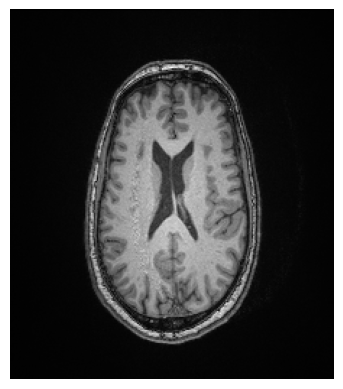

In [ ]:
plt.imshow(sample_image, cmap="gray")
plt.axis("off")
plt.show()

In [ ]:
sample_image_pil = Image.fromarray(sample_image)
sample_image_pil = sample_image_pil.convert('L')
sample_image_pil.save("test_image_slice.jpg")

In [ ]:
cv2.imwrite("test_image_slice_cv.jpg", sample_image)

True

In [ ]:
# shape = sample_image.shape

image_scaled = minmax_scale(sample_image.ravel(), feature_range=(0,255)).reshape(sample_image.shape)

In [ ]:
cv2.imwrite("test_image_slice_cv_scaled.jpg", image_scaled)

True